In [ ]:
# Подтягиваем библиотеки

from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns

## Генерируем тестовый датасет

In [ ]:
# Сгенерируем рандомный датасет

x = random.randint(0,2, size=(5000, 2))
y = random.randint(0,7000, size=(5000, 1))
df0 = pd.DataFrame(x,columns=['city','couriers'])
df1 = pd.DataFrame(y, columns=['ltv'])
df = df0.join(df1)


In [ ]:
# Преобразуем булевые значения городов и курьеров в категории

df['city']= df['city'].apply(lambda x: 'B' if x else 'A')
df['couriers']= df['couriers'].apply(lambda x: 'courier_rest' if x else 'courier_our')

In [ ]:
df.head(10) # тестовый датасет 5000 поз.

,city,couriers,ltv
0,A,courier_our,2772
1,B,courier_our,4500
2,A,courier_rest,3204
3,B,courier_rest,26
4,B,courier_rest,681
5,A,courier_rest,3041
6,A,courier_our,1290
7,B,courier_rest,3255
8,A,courier_rest,4171
9,A,courier_rest,1351


## Проверяем количественные данные (LTV) на нормальность распределения

Text(0.5, 0, 'LTV, руб')

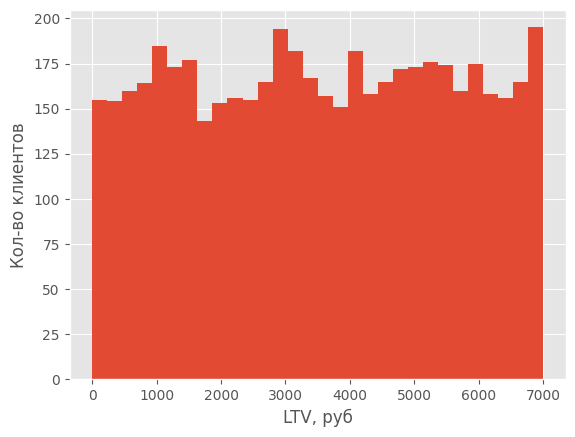

In [ ]:
# Проверим на гистограме нормальность распределения количественного показателя LTV по всем клиентам

plt.style.use('ggplot')
df['ltv'].hist(bins=30)
plt.ylabel('Кол-во клиентов')
plt.xlabel('LTV, руб')

Визуально данные не имеют нормального распределения. Для убедительности,  рассчитаем коэффициенты.

In [ ]:
df['ltv'].describe().astype(int)

count    5000
mean     3536
std      2019
min         0
25%      1774
50%      3525
75%      5292
max      6999
Name: ltv, dtype: int64

In [ ]:
# Проверка нормальности распределения количественной переменной критериями Шапиро-Уйлка и Д`Агостино

shapiro = stats.shapiro(df['ltv'])
d_agostino = stats.normaltest(df['ltv'])

print(shapiro, d_agostino, sep='\n')

ShapiroResult(statistic=0.9552282691001892, pvalue=1.1948514618137374e-36)
NormaltestResult(statistic=4110.122018903278, pvalue=0.0)


In [ ]:
std = df['ltv'].std().astype(int)  # Рассчитаем средне квадратическое отклонение
a = df['ltv'].skew() # Рассчитаем коэффициент асимметрии (смещение вправо/влево)
e = df['ltv'].kurtosis() # Рассчитаем коэффициент эксцесса (смещение вниз/вверх)

print(f'Стандартное отклонение: {std}, Асимметрия: {a}, Эксцесса: {e}')

Стандартное отклонение: 2019, Асимметрия: -0.014599691655570958, Эксцесса: -1.1959978900297443


> По значениям рассчитанных критериев и показателя p-value сильно ниже уровня значимости (0,05), можно сделать однозначный вывод о том, что количественные данные LTV не имеют нормального распределения.

**ВЫВОД:** т.к. количественные данные не имеют нормального распределения, для дальнейшего сравнения двух независимых выборок будем использовать критерий Манна-Уитни

## Проверим влияние категориального фактора "город" на показатель LTV

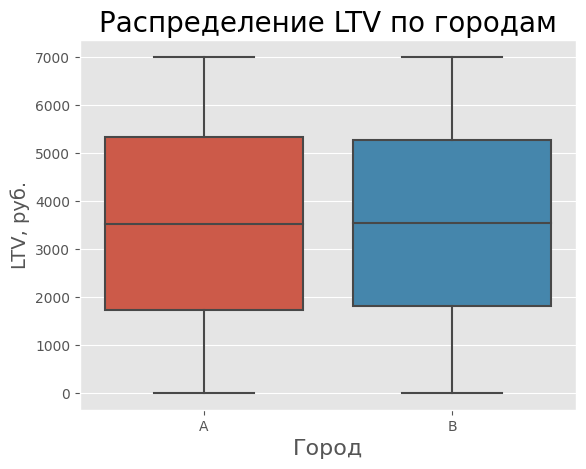

In [ ]:
# Выведем боксплот зависимости LTV от города

plt.style.use('ggplot')
exp = sns.boxplot(x='city', y='ltv', data=df)
exp.axes.set_title('Распределение LTV по городам' , fontsize=20)
exp.set_xlabel('Город', fontsize=16)
exp.set_ylabel('LTV, руб.', fontsize=14)
plt.show()

In [ ]:
# Cоздаем фильтры по городам

df_A = df[df['city'] == 'A']
df_B = df[df['city'] == 'B']

In [ ]:
# Определяем значение статистики стьюдента p-value

scipy.stats.mannwhitneyu(df_A['ltv'], df_B['ltv'])  

MannwhitneyuResult(statistic=3109008.5, pvalue=0.7865866023021704)

> По результатам оценки критерием Манна-Уитни нет достаточных оснований, чтобы отвергнуть Н0 гипотезу об отсутствии влияния города расположения клиента на LTV. Следовательно мы НЕ можем однозначно утверждать, что город клиента влияет на LTV.

**ВЫВОД:** по рассчитанному критерию и уровню p-value, сравниваем его с заданным уровнем значимости (0,05). Если p-value меньше уровня значимости и город клиента влияет на LTV, оценку влияния курьеров на LTV производим для каждого города отдельно

# 1) Если город влияет на LTV

### Определим влияние категориального фактора "группа курьеров" на показатель LTV в городе А

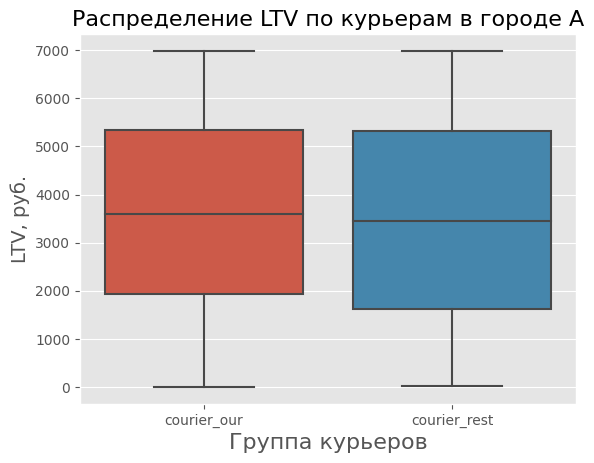

In [ ]:
# Выведем боксплот зависимости LTV от группы курьеров

plt.style.use('ggplot')
exp = sns.boxplot(x='couriers', y='ltv', data=df_A)
exp.axes.set_title('Распределение LTV по курьерам в городе А' , fontsize=16)
exp.set_xlabel('Группа курьеров', fontsize=16)
exp.set_ylabel('LTV, руб.', fontsize=14)
plt.show()

In [ ]:
# Cоздаем фильтры по городам

df_rest = df_A[df_A['couriers'] == 'courier_rest']
df_our = df_A[df_A['couriers'] == 'courier_our']

In [ ]:
# Определяем значение статистики стьюдента p-value

scipy.stats.mannwhitneyu(df_rest['ltv'], df_our['ltv'])  

MannwhitneyuResult(statistic=803124.5, pvalue=0.2885000038247979)

> По результатам оценки критерием Манна-Уитни и уровня p-value нет достаточных оснований, чтобы отвергнуть Н0 гипотезу об отсутствии влияния группы курьеров на LTV в городе А. 

Следовательно мы НЕ можем однозначно утверждать, что доставка определенными курьерами влияет на LTV.

### Определим влияние категориального фактора "группа курьеров" на показатель LTV в городе B

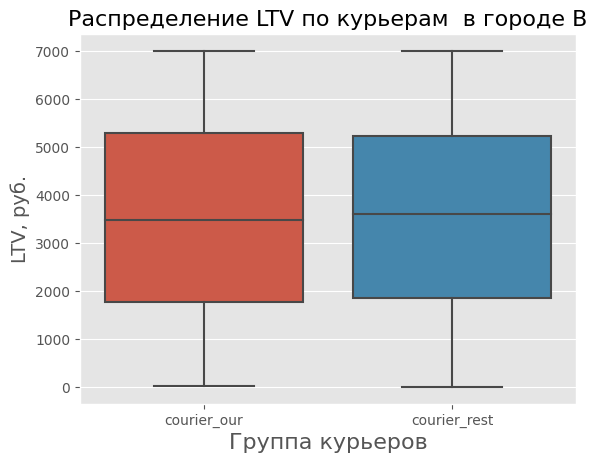

In [ ]:
# Выведем боксплот зависимости LTV от группы курьеров

plt.style.use('ggplot')
exp = sns.boxplot(x='couriers', y='ltv', data=df_B)
exp.axes.set_title('Распределение LTV по курьерам  в городе В' , fontsize=16)
exp.set_xlabel('Группа курьеров', fontsize=16)
exp.set_ylabel('LTV, руб.', fontsize=14)
plt.show()

In [ ]:
# Cоздаем фильтры по городам

df_rest = df_B[df_B['couriers'] == 'courier_rest']
df_our = df_B[df_B['couriers'] == 'courier_our']

In [ ]:
# Определяем значение статистики стьюдента p-value

scipy.stats.mannwhitneyu(df_rest['ltv'], df_our['ltv'])  

MannwhitneyuResult(statistic=747125.5, pvalue=0.7011583741025377)

> По результатам оценки критерием Манна-Уитни и уровня p-value нет достаточных оснований, чтобы отвергнуть Н0 гипотезу об отсутствии влияния группы курьеров на LTV в городе B. 

Следовательно мы НЕ можем однозначно утверждать, что доставка определенными курьерами влияет на LTV.

# 2) Если город не влияет на LTV

### Определим влияние категориального фактора "группа курьеров" на показатель LTV всех клиентов

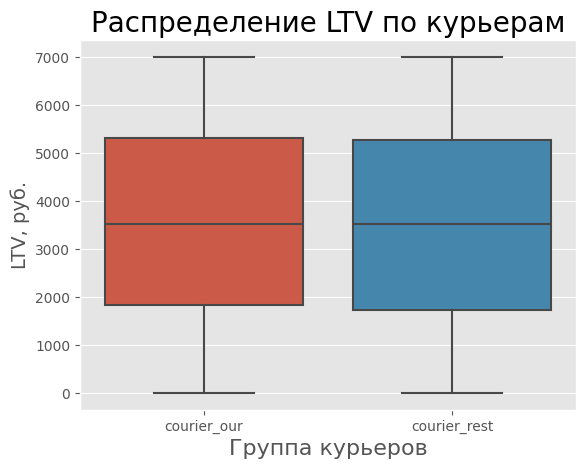

In [ ]:
# Выведем боксплот зависимости LTV от группы курьеров

plt.style.use('ggplot')
exp = sns.boxplot(x='couriers', y='ltv', data=df)
exp.axes.set_title('Распределение LTV по курьерам' , fontsize=20)
exp.set_xlabel('Группа курьеров', fontsize=16)
exp.set_ylabel('LTV, руб.', fontsize=14)
plt.show()

In [ ]:
# Cоздаем фильтры по городам

df_rest = df[df['couriers'] == 'courier_rest']
df_our = df[df['couriers'] == 'courier_our']

In [ ]:
# Определяем значение статистики стьюдента p-value

scipy.stats.mannwhitneyu(df_rest['ltv'], df_our['ltv'])  

MannwhitneyuResult(statistic=3098691.0, pvalue=0.6075487902981005)

> По результатам оценки критерием Манна-Уитни так же нет достаточных оснований, чтобы отвергнуть Н0 гипотезу об отсутствии влияния группы курьеров на LTV. Следовательно мы НЕ можем однозначно утверждать, что доставка определенными курьерами влияет на LTV.

---

#**ВЫВОД:** 
## По результатам рассчета критерия Манна-Уитни и уровню p-value, сравниваем его с заданным уровнем значимости (0,05). 

## Если p-value меньше уровня значимости, делаем вывод о влиянии разных групп курьеров на LTV

## Если p-value больше уровня значимости, мы НЕ можем однозначно утверждать, что доставка определенными курьерами влияет на LTV